# Тема работы: "Психологическое здоровье студентов"

# Описание проекта

Для работы был взят датасет "**Student Mental health**". Этот набор данных был собран в ходе опроса, проведенного с помощью *Google Forms* среди студентов университета с целью изучения их текущей академической успеваемости и психического здоровья. Все **данные** были получены из Малайзии и **предоставлены IIUM** (Международным университетом Икамил, Малайзия).

В данной работе будет устанавливаться **зависимость** между **психологическим состоянием** студентов и их **успеваемостью**, а также возможная **взаимосвязь** между **возрастом, полом, изучаемым курсом и семейным положением**.

Также важно обратить внимание на систему оценивания в данном университе. Для оценки успеваемости студентов используется **CGPA**. CGPA означает совокупный средний балл успеваемости. Обычно он используется для измерения общей академической успеваемости студента. CGPA рассчитывается путем получения среднего балла, который студент получает за каждый семестр, и делится на общее количество зачетных единиц. В данном университете **4 - максимум, а 0 - минимум**.



### Расшифровка наименований некоторых специальностей:
1. benl - Bachelor of English Language
2. bit - Bachelor of Information Technology
3. bcs - Bachelor of Computer Science (Компьютерные науки, бакалавриат)
4. engineering (Инженерия)

# Цели и задачи проекта

### Цель исследования:
Повысить успеваемость студентов.

### Задачи исследования:
1. Установить зависимость между психичеким состоянием студентов и их успеваемостью.
2. Придумать способы улучшить ментальное состояние студентов.

### Бизнес-задачи исследования:
1. Убедить спонсоров вкладывать б**о**льшие средства в финансирование университета, а также психологическую медицину.
2. Привлечь новых обучающихся.
3. Повысить престиж университета.



# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [1]:
# @title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# @title
data = pd.read_csv('Student Mental health.csv')
data
#data= pd.read_html('https://www.kaggle.com/datasets/shariful07/student-mental-health', match = 'Student Mental health')

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


Выводим строки датафрейма, чтобы бегло просмотреть данные и выявить отклонения.

In [3]:
# @title
data.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [4]:
# @title
data.tail(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
91,13/07/2020 14:38:12,Male,18.0,Koe,Year 2,3.00 - 3.49,No,No,Yes,No,No
92,13/07/2020 14:48:05,Female,19.0,KOE,year 2,3.00 - 3.49,Yes,Yes,No,No,No
93,13/07/2020 16:15:13,Female,18.0,BENL,year 1,3.00 - 3.49,No,Yes,No,No,No
94,13/07/2020 17:30:44,Female,24.0,Fiqh,Year 3,0 - 1.99,No,No,No,Yes,No
95,13/07/2020 19:08:32,Female,18.0,Islamic Education,year 1,3.50 - 4.00,No,No,No,No,No
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [5]:
# @title
data.sample(10)   # Случайная выборка строк

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
54,8/7/2020 15:57,Female,19.0,BCS,year 1,3.50 - 4.00,No,Yes,No,Yes,Yes
82,13/07/2020 10:12:26,Female,19.0,Engineering,year 1,3.00 - 3.49,No,Yes,Yes,No,No
85,13/07/2020 10:33:47,Female,18.0,psychology,year 1,3.50 - 4.00,No,Yes,Yes,No,Yes
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
68,8/7/2020 19:05,Female,18.0,Malcom,year 1,3.50 - 4.00,No,Yes,No,No,No
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No
73,9/7/2020 6:57,Male,18.0,Biomedical science,year 1,0 - 1.99,No,No,No,No,No
84,13/07/2020 10:14:46,Male,23.0,Radiography,year 1,3.00 - 3.49,No,No,No,No,No
89,13/07/2020 11:54:58,Male,24.0,Engineering,Year 2,2.00 - 2.49,No,No,No,Yes,No
71,8/7/2020 21:21,Female,18.0,Laws,Year 3,3.50 - 4.00,No,No,No,Yes,No


Этим способом можно вывести такую информацию о датафрейме, как размер занимаемой памяти, место сохранения и т.д.

In [6]:
# @title
data.info

<bound method DataFrame.info of                Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 - 3.49             No   
1                       year 2        3.00 - 3.49             No   
2                       Year 1        3.00 - 3.49             No   
3                       year 3        3.00 - 3.49            Yes   
4                       year 4        3.00 - 3.49             No   
..                         ...                ...            ...   
96                      year 1        3.50 - 4.00             No   
97                      Year 2        3.00 - 3.49             No   
98                      Year 3        3.50 - 4.00            Yes   
99                      year 4        3.50 - 4.00             No   
100                     Year 2        3.00 - 3.49             No   

    Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                       Yes                   No                       Yes   
1                        No                  Yes                        No   
2                       Yes                  Yes                       Yes   
3                       Yes                   No                        No   
4                        No                   No                        No   
..                      ...                  ...                       ...   
96                       No                  Yes                        No   
97                      Yes                  Yes                        No   
98                      Yes                   No                       Yes   
99                       No                   No                        No   
100                      No                   No                        No   

    Did you seek any specialist for a treatment?  
0                                             No  
1                                             No  
2                                             No  
3                                             No  
4                                             No  
..                                           ...  
96                                            No  
97                                            No  
98                                            No  
99                                            No  
100                                           No  

[101 rows x 11 columns]>

Просмотр типов данных в датафрейме.

In [7]:
# @title
data.dtypes

,0
Timestamp,object
Choose your gender,object
Age,float64
What is your course?,object
Your current year of Study,object
What is your CGPA?,object
Marital status,object
Do you have Depression?,object
Do you have Anxiety?,object
Do you have Panic attack?,object


Посмотрим количесвтво строк и столбцов, а выведем их названия.

In [8]:
# @title
data.shape

(101, 11)

In [9]:
# Строки
data.shape[0]

101

In [10]:
# Столбцы
data.shape[1]

11

In [11]:
# @title
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

Узнаем сколько места занимает датафрейм, а также количество ненулевых значений по столбцам.

In [12]:
# @title
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [13]:
# @title
data.memory_usage()

,0
Index,128
Timestamp,808
Choose your gender,808
Age,808
What is your course?,808
Your current year of Study,808
What is your CGPA?,808
Marital status,808
Do you have Depression?,808
Do you have Anxiety?,808


### Проверьте корректность наименований столбцов, соответствие «змеиному регистру». Приведите наименования столбцов и весь текст в датафрейме к единому (нижнему) регистру.


`data.columns` — это объект, представляющий названия всех столбцов в датафрейме.

`.str.lower()` — это метод, который применяется к каждому элементу (названию столбца) в созданном объекте, чтобы преобразовать все буквы в строчные.

`.str.replace(' ', '_')` — это метод, который заменяет пробелы в названиях столбцов на символ подчеркивания.

In [14]:
# Для начала изменим названия столбцов
data.columns = data.columns.str.lower().str.replace(' ', '_')
data

,timestamp,choose_your_gender,age,what_is_your_course?,your_current_year_of_study,what_is_your_cgpa?,marital_status,do_you_have_depression?,do_you_have_anxiety?,do_you_have_panic_attack?,did_you_seek_any_specialist_for_a_treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


 `applymap()` применяется ко всем элементам датафрейма
 `lambda x: x.lower() if isinstance(x, str) else x` - это лямбда-функция(анонимные функции, которые могут включать только одно выражение. Лямбда-функции могут принимать любое количество аргументов, но могут возвращать только одно значение), которая преобразует каждый элемент `x` в нижний регистр, если `x` является строкой, в противном случае возвращает `x` без изменений.

In [15]:
# @title
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
data

<ipython-input-15-3d300ba259d3>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,timestamp,choose_your_gender,age,what_is_your_course?,your_current_year_of_study,what_is_your_cgpa?,marital_status,do_you_have_depression?,do_you_have_anxiety?,do_you_have_panic_attack?,did_you_seek_any_specialist_for_a_treatment?
0,8/7/2020 12:02,female,18.0,engineering,year 1,3.00 - 3.49,no,yes,no,yes,no
1,8/7/2020 12:04,male,21.0,islamic education,year 2,3.00 - 3.49,no,no,yes,no,no
2,8/7/2020 12:05,male,19.0,bit,year 1,3.00 - 3.49,no,yes,yes,yes,no
3,8/7/2020 12:06,female,22.0,laws,year 3,3.00 - 3.49,yes,yes,no,no,no
4,8/7/2020 12:13,male,23.0,mathemathics,year 4,3.00 - 3.49,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,female,21.0,bcs,year 1,3.50 - 4.00,no,no,yes,no,no
97,13/07/2020 21:21:42,male,18.0,engineering,year 2,3.00 - 3.49,no,yes,yes,no,no
98,13/07/2020 21:22:56,female,19.0,nursing,year 3,3.50 - 4.00,yes,yes,no,yes,no
99,13/07/2020 21:23:57,female,23.0,pendidikan islam,year 4,3.50 - 4.00,no,no,no,no,no


Переименуем столбцы для удобной работы с ними, а также соответствия "змеиному" стилю.

In [16]:
# @title
data.rename(columns = {'choose_your_gender':'gender'}, inplace=True)
data.rename(columns = {'your_current_year_of_study':'study_time'}, inplace=True)
data.rename(columns = {'what_is_your_cgpa?':'cgpa'}, inplace=True)
data.rename(columns = {'what_is_your_course?':'name_of_course'}, inplace=True)
data.rename(columns = {'do_you_have_depression?':'depression'}, inplace=True)
data.rename(columns = {'do_you_have_anxiety?':'anxiety'}, inplace=True)
data.rename(columns = {'do_you_have_panic_attack?':'panic_attack'}, inplace=True)
data.rename(columns = {'did_you_seek_any_specialist_for_a_treatment?':'treatment'}, inplace=True)
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,8/7/2020 12:02,female,18.0,engineering,year 1,3.00 - 3.49,no,yes,no,yes,no
1,8/7/2020 12:04,male,21.0,islamic education,year 2,3.00 - 3.49,no,no,yes,no,no
2,8/7/2020 12:05,male,19.0,bit,year 1,3.00 - 3.49,no,yes,yes,yes,no
3,8/7/2020 12:06,female,22.0,laws,year 3,3.00 - 3.49,yes,yes,no,no,no
4,8/7/2020 12:13,male,23.0,mathemathics,year 4,3.00 - 3.49,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,female,21.0,bcs,year 1,3.50 - 4.00,no,no,yes,no,no
97,13/07/2020 21:21:42,male,18.0,engineering,year 2,3.00 - 3.49,no,yes,yes,no,no
98,13/07/2020 21:22:56,female,19.0,nursing,year 3,3.50 - 4.00,yes,yes,no,yes,no
99,13/07/2020 21:23:57,female,23.0,pendidikan islam,year 4,3.50 - 4.00,no,no,no,no,no


### **Выводы**

1. В датафрейме 101 строка (вместе с заголовками столбцов), 11 столбцов.
2. В 1 столбце имеется 1 пропущенное значение.
3. Нарушение стиля в заголовках столбцов, был изменён регистр.
4. Для ряда столбцов можно изменить тип данных для снижения нагрузки и удобства визуализации данных.
5. Более детально необходимо посмотреть на строковые значения в столбцах **your_study_time** (смешаны строковые и целочисленные значения); **timestamp** (начиная с 77 строки записи не подходят под тип даты).
6. Столбец **cgpa** следует привести к значениям типа *float*, заменив диапазон на среднее значение ячейки.

## 2. Изучение пропущенных значений

Проверьте датафрейм на пропуски. Заполните пропущенные значения.
Для каждой замены укажите, почему пропущенные значения заполняются именно
таким образом. (NB! Если строки с пропусками составляют не более 5% от
общего числа строк и заполнить их не представляется возможным, в этом случае
строки можно удалить.)

In [17]:
# @title
data.count()   # Количество ненулевых значений

,0
timestamp,101
gender,101
age,100
name_of_course,101
study_time,101
cgpa,101
marital_status,101
depression,101
anxiety,101
panic_attack,101


In [18]:
# @title
data.isnull().sum()

,0
timestamp,0
gender,0
age,1
name_of_course,0
study_time,0
cgpa,0
marital_status,0
depression,0
anxiety,0
panic_attack,0


`isnull()` возвращает булевое значение, указывающее, содержит ли каждая строка/столбец `NaN`. `any(axis=1)` используется, чтобы выполнять поиск по строкам.

In [19]:
# @title
null_values = data[data.isnull().any(axis=1)]
print("Строка, содержащая нулевое значение:")
print(null_values)

Строка, содержащая нулевое значение:
         timestamp gender  age name_of_course study_time      cgpa  \
43  8/7/2020 15:07   male  NaN            bit     year 1  0 - 1.99   

   marital_status depression anxiety panic_attack treatment  
43             no         no      no           no        no  


Заполнение пропущенных значений зависит от контекста данных. Например:

- Для числовых столбцов возможно использование среднего или медианного значения.
- Для категориальных столбцов использование наиболее частого значения (мода).

Если строки с пропусками составляют менее 5%, их можно удалить:

In [20]:
# @title
data.dropna(inplace=True)
data.count()

,0
timestamp,100
gender,100
age,100
name_of_course,100
study_time,100
cgpa,100
marital_status,100
depression,100
anxiety,100
panic_attack,100


Я воспльзовалась удалением строки, т.к. возраст опрошенного нельзя узнать наверняка.

## 3. Изменение типов данных

 Измените типы данных в столбцах, где это необходимо, объясните
изменения.

 - `['study_time']. str.extract (r '(\ d+)', expand = false)` извлекает числа, используя регулярное выражение `r '(\ d+)'`.Этот шаблон соответствует одной или нескольким цифрам.
 - `exprand = false` гарантирует, что возвращаются только извлеченные числа, а не отдельный фрейм данных.
 - `astype (int)` преобразует извлеченные числа в целые числа.

In [21]:
# @title
# Удаляем текстовые значения из столбца "study_time" и оставляем только числа, преобразуя к типу int
data['study_time'] = data['study_time'].str.extract(r'(\d+)', expand=False).astype(int)
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,8/7/2020 12:02,female,18.0,engineering,1,3.00 - 3.49,no,yes,no,yes,no
1,8/7/2020 12:04,male,21.0,islamic education,2,3.00 - 3.49,no,no,yes,no,no
2,8/7/2020 12:05,male,19.0,bit,1,3.00 - 3.49,no,yes,yes,yes,no
3,8/7/2020 12:06,female,22.0,laws,3,3.00 - 3.49,yes,yes,no,no,no
4,8/7/2020 12:13,male,23.0,mathemathics,4,3.00 - 3.49,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,female,21.0,bcs,1,3.50 - 4.00,no,no,yes,no,no
97,13/07/2020 21:21:42,male,18.0,engineering,2,3.00 - 3.49,no,yes,yes,no,no
98,13/07/2020 21:22:56,female,19.0,nursing,3,3.50 - 4.00,yes,yes,no,yes,no
99,13/07/2020 21:23:57,female,23.0,pendidikan islam,4,3.50 - 4.00,no,no,no,no,no


In [22]:
# @title
data['cgpa'] = data['cgpa'].apply(lambda x: sum(map(float, x.split('-'))) / 2 if '-' in x else float(x))
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,8/7/2020 12:02,female,18.0,engineering,1,3.245,no,yes,no,yes,no
1,8/7/2020 12:04,male,21.0,islamic education,2,3.245,no,no,yes,no,no
2,8/7/2020 12:05,male,19.0,bit,1,3.245,no,yes,yes,yes,no
3,8/7/2020 12:06,female,22.0,laws,3,3.245,yes,yes,no,no,no
4,8/7/2020 12:13,male,23.0,mathemathics,4,3.245,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,female,21.0,bcs,1,3.750,no,no,yes,no,no
97,13/07/2020 21:21:42,male,18.0,engineering,2,3.245,no,yes,yes,no,no
98,13/07/2020 21:22:56,female,19.0,nursing,3,3.750,yes,yes,no,yes,no
99,13/07/2020 21:23:57,female,23.0,pendidikan islam,4,3.750,no,no,no,no,no


- Мы используем метод `apply`, чтобы применить функцию к каждому значению в столбце "*cgpa*".
- Если в значении есть тире, оно будет разделено, и каждое значение преобразуется в флоат. Затем мы суммируем эти значения и делим на 2 для получения среднего.
- Если тире нет, просто преобразуем значение в флоат.

Приведём столбец `timestamp` к типу время.

In [23]:
# @title
data['timestamp'] = pd.to_datetime(data['timestamp'], format='mixed')
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,2020-08-07 12:02:00,female,18.0,engineering,1,3.245,no,yes,no,yes,no
1,2020-08-07 12:04:00,male,21.0,islamic education,2,3.245,no,no,yes,no,no
2,2020-08-07 12:05:00,male,19.0,bit,1,3.245,no,yes,yes,yes,no
3,2020-08-07 12:06:00,female,22.0,laws,3,3.245,yes,yes,no,no,no
4,2020-08-07 12:13:00,male,23.0,mathemathics,4,3.245,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,female,21.0,bcs,1,3.750,no,no,yes,no,no
97,2020-07-13 21:21:42,male,18.0,engineering,2,3.245,no,yes,yes,no,no
98,2020-07-13 21:22:56,female,19.0,nursing,3,3.750,yes,yes,no,yes,no
99,2020-07-13 21:23:57,female,23.0,pendidikan islam,4,3.750,no,no,no,no,no


Изменим типы остальных стобцов и проверим изменения.

In [24]:
# @title
data = data.astype({
    'gender':'str',
    'name_of_course':'string',
    'cgpa':'float',
    'gender':'string',
    'marital_status':'string',
    'depression':'string',
    'anxiety':'string',
    'panic_attack':'string',
    'treatment':'string',
    'age':'int64'})
data.dtypes

,0
timestamp,datetime64[ns]
gender,string[python]
age,int64
name_of_course,string[python]
study_time,int64
cgpa,float64
marital_status,string[python]
depression,string[python]
anxiety,string[python]
panic_attack,string[python]


## 4. Поиск дубликатов

 Выполните поиск дубликатов в данных. Объясните наличие дубликатов
(если таковые имеются). Выполните удаление дубликатов.

In [25]:
# @title
duplicates = data.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 0


   * Если `inplace=True`, метод удаляет дубликаты из исходного датафрейма и возвращает `None`.
   * Если `inplace=False`, метод создает и возвращает новый датафрейм без дублей, оставляя исходный датафрейм неизмененным.

In [26]:
# @title
data.drop_duplicates(inplace=True)

## 5. Выводы к разделу 1

Сделайте промежуточные выводы о проделанной работе.

- Столбец `cgpa` был преобразован к типу *float*, путём замены значения ячейки с диапазона на среднее.
- Столбцы `age` и `study_time` были приведены к типу *int*.
- Пропущенное значение было удалено для предупреждения ошибок при обработке данных.
- Cтолб `timestamp` был приведён к типу *datatime*.
- Дубликаты не были обнаружены.
- После выполнения всех проверок и корректировок, я получила более чистый и структурированный датафрейм, который можно использовать для дальнейшего анализа.

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [27]:
# @title
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,2020-08-07 12:02:00,female,18,engineering,1,3.245,no,yes,no,yes,no
1,2020-08-07 12:04:00,male,21,islamic education,2,3.245,no,no,yes,no,no
2,2020-08-07 12:05:00,male,19,bit,1,3.245,no,yes,yes,yes,no
3,2020-08-07 12:06:00,female,22,laws,3,3.245,yes,yes,no,no,no
4,2020-08-07 12:13:00,male,23,mathemathics,4,3.245,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,female,21,bcs,1,3.750,no,no,yes,no,no
97,2020-07-13 21:21:42,male,18,engineering,2,3.245,no,yes,yes,no,no
98,2020-07-13 21:22:56,female,19,nursing,3,3.750,yes,yes,no,yes,no
99,2020-07-13 21:23:57,female,23,pendidikan islam,4,3.750,no,no,no,no,no


Выполните индексацию по координаторам (не менее 5 различных
условий) и логическую индексацию (не менее 5 различных условий). Выведите результаты.

In [28]:
# @title
data.loc[78, ]

,78
timestamp,2020-07-13 10:07:32
gender,female
age,19
name_of_course,biotechnology
study_time,3
cgpa,0.995
marital_status,no
depression,no
anxiety,no
panic_attack,no


In [29]:
# @title
data.loc[data['depression'] == 'yes'].count()

,0
timestamp,35
gender,35
age,35
name_of_course,35
study_time,35
cgpa,35
marital_status,35
depression,35
anxiety,35
panic_attack,35


In [30]:
# @title
data.loc[data['anxiety'] == 'yes'].count()

,0
timestamp,34
gender,34
age,34
name_of_course,34
study_time,34
cgpa,34
marital_status,34
depression,34
anxiety,34
panic_attack,34


In [31]:
# @title
data.loc[data['panic_attack'] == 'yes'].count()

,0
timestamp,33
gender,33
age,33
name_of_course,33
study_time,33
cgpa,33
marital_status,33
depression,33
anxiety,33
panic_attack,33


In [32]:
# @title
data.loc[(data['age'] == 18)].count()

,0
timestamp,32
gender,32
age,32
name_of_course,32
study_time,32
cgpa,32
marital_status,32
depression,32
anxiety,32
panic_attack,32


In [33]:
# @title
data.loc[(data['age'] >= 20) &
    ((data['panic_attack'] == 'yes') |
    (data['anxiety'] == 'yes') |
    (data['depression'] == 'yes'))].count()

,0
timestamp,29
gender,29
age,29
name_of_course,29
study_time,29
cgpa,29
marital_status,29
depression,29
anxiety,29
panic_attack,29


In [34]:
# @title
data.loc[(data['cgpa'] >= 3.75) & (data['gender'] == 'male')].count()

,0
timestamp,9
gender,9
age,9
name_of_course,9
study_time,9
cgpa,9
marital_status,9
depression,9
anxiety,9
panic_attack,9


In [35]:
# @title
data.loc[(data['cgpa'] >= 3.75) & (data['gender'] == 'female')].count()

,0
timestamp,39
gender,39
age,39
name_of_course,39
study_time,39
cgpa,39
marital_status,39
depression,39
anxiety,39
panic_attack,39


In [36]:
# @title
data.iloc[44:48, 7:12]

,depression,anxiety,panic_attack,treatment
45,no,yes,yes,no
46,no,yes,no,no
47,no,no,no,no
48,yes,no,no,no


In [37]:
# @title
data.loc[(data['study_time'] >= 3) & (data['depression'] == 'yes')].count()

,0
timestamp,11
gender,11
age,11
name_of_course,11
study_time,11
cgpa,11
marital_status,11
depression,11
anxiety,11
panic_attack,11


In [38]:
# @title
data.loc[(data['study_time'] >= 3) & (data['anxiety'] == 'yes')].count()

,0
timestamp,10
gender,10
age,10
name_of_course,10
study_time,10
cgpa,10
marital_status,10
depression,10
anxiety,10
panic_attack,10


In [39]:
# @title
data.loc[(data['study_time'] < 3) & (data['panic_attack'] == 'yes')].count()

,0
timestamp,22
gender,22
age,22
name_of_course,22
study_time,22
cgpa,22
marital_status,22
depression,22
anxiety,22
panic_attack,22


In [40]:
# @title
data[(data['treatment'] == 'no') &
    (data['depression'] == 'yes') &
    (data['anxiety'] == 'yes') &
    (data['panic_attack'] == 'yes')]

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
2,2020-08-07 12:05:00,male,19,bit,1,3.245,no,yes,yes,yes,no
17,2020-08-07 12:52:00,female,24,enm,4,3.245,yes,yes,yes,yes,no
19,2020-08-07 13:07:00,female,18,marine science,2,3.750,yes,yes,yes,yes,no
24,2020-08-07 13:17:00,female,23,bcs,3,3.750,no,yes,yes,yes,no
34,2020-08-07 14:41:00,female,19,bit,1,3.245,no,yes,yes,yes,no
37,2020-08-07 14:45:00,female,19,bit,1,2.745,no,yes,yes,yes,no
53,2020-08-07 15:48:00,female,20,koe,3,3.245,yes,yes,yes,yes,no
80,2020-07-13 10:11:26,female,24,communication,2,3.750,yes,yes,yes,yes,no
87,2020-07-13 11:46:13,female,18,psychology,1,3.750,no,yes,yes,yes,no


In [41]:
# @title
data[data['gender'] == 'male'].count()

,0
timestamp,25
gender,25
age,25
name_of_course,25
study_time,25
cgpa,25
marital_status,25
depression,25
anxiety,25
panic_attack,25


In [42]:
# @title
data[data['gender'] == 'female'].count()

,0
timestamp,75
gender,75
age,75
name_of_course,75
study_time,75
cgpa,75
marital_status,75
depression,75
anxiety,75
panic_attack,75


In [43]:
# @title
data[(data['treatment'] == 'yes') & (data['marital_status'] == 'yes')]

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
28,2020-08-07 13:58:00,female,24,bit,3,3.750,yes,yes,yes,yes,yes
33,2020-08-07 14:31:00,male,18,bcs,2,3.750,yes,yes,yes,no,yes
39,2020-08-07 14:56:00,female,24,engineering,2,2.745,yes,yes,no,yes,yes
50,2020-08-07 15:27:00,female,23,ala,1,2.745,yes,yes,no,yes,yes


In [44]:
# @title
data[data['name_of_course'] == 'law']

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
36,2020-08-07 14:43:00,female,18,law,3,3.245,no,yes,yes,no,no


In [45]:
# @title
data[data['age'] < 22]

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,2020-08-07 12:02:00,female,18,engineering,1,3.245,no,yes,no,yes,no
1,2020-08-07 12:04:00,male,21,islamic education,2,3.245,no,no,yes,no,no
2,2020-08-07 12:05:00,male,19,bit,1,3.245,no,yes,yes,yes,no
5,2020-08-07 12:31:00,male,19,engineering,2,3.750,no,no,no,yes,no
7,2020-08-07 12:33:00,female,18,bcs,1,3.750,no,no,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...
95,2020-07-13 19:08:32,female,18,islamic education,1,3.750,no,no,no,no,no
96,2020-07-13 19:56:49,female,21,bcs,1,3.750,no,no,yes,no,no
97,2020-07-13 21:21:42,male,18,engineering,2,3.245,no,yes,yes,no,no
98,2020-07-13 21:22:56,female,19,nursing,3,3.750,yes,yes,no,yes,no


## 2. Сортировка данных

Выполните сортировку данных (по различным столбцам).
Проанализируйте наибольшие и наименьшие значения, **сделайте выводы в
рамках бизнес-задачи**.

In [46]:
# @title
data.sort_values(['cgpa', 'age'], ascending=True)

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
73,2020-09-07 06:57:00,male,18,biomedical science,1,0.995,no,no,no,no,no
78,2020-07-13 10:07:32,female,19,biotechnology,3,0.995,no,no,no,no,no
94,2020-07-13 17:30:44,female,24,fiqh,3,0.995,no,no,no,yes,no
35,2020-08-07 14:43:00,female,18,engineering,1,2.245,no,no,no,no,no
89,2020-07-13 11:54:58,male,24,engineering,2,2.245,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...
64,2020-08-07 17:46:00,female,24,engine,1,3.750,no,no,no,no,no
74,2020-09-07 11:43:00,male,24,bit,3,3.750,no,no,yes,no,no
75,2020-09-07 11:57:00,female,24,koe,1,3.750,no,no,yes,yes,no
80,2020-07-13 10:11:26,female,24,communication,2,3.750,yes,yes,yes,yes,no


In [47]:
# @title
data.sort_values(['gender', 'name_of_course'], ascending=True)  # В алфавитном порядке

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
16,2020-08-07 12:46:00,female,24,accounting,3,3.245,no,no,no,no,no
50,2020-08-07 15:27:00,female,23,ala,1,2.745,yes,yes,no,yes,yes
25,2020-08-07 13:29:00,female,18,banking studies,1,3.750,no,no,no,no,no
7,2020-08-07 12:33:00,female,18,bcs,1,3.750,no,no,yes,no,no
12,2020-08-07 12:40:00,female,18,bcs,1,3.245,no,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
91,2020-07-13 14:38:12,male,18,koe,2,3.245,no,no,yes,no,no
4,2020-08-07 12:13:00,male,23,mathemathics,4,3.245,no,no,no,no,no
67,2020-08-07 18:11:00,male,19,mhsc,3,3.245,yes,yes,no,yes,no
84,2020-07-13 10:14:46,male,23,radiography,1,3.245,no,no,no,no,no


In [48]:
# @title
max_age = data['age'].max()
min_age = data['age'].min()

print(f"Максимальный возраст: {max_age}, Минимальный возраст: {min_age}")

Максимальный возраст: 24, Минимальный возраст: 18


In [49]:
# @title
max_cgpa = data['cgpa'].max()
min_cgpa = data['cgpa'].min()

print(f"Лучшая оценка: {max_cgpa}, Худшая оценка: {min_cgpa}")

Лучшая оценка: 3.75, Худшая оценка: 0.995


## 3. Фильтрация данных

Отфильтруйте строки на основе одного или нескольких условий,
отобразите отфильтрованные данные. Для фильтрации используйте метод query
(не менее 5 различных фильтров), оператор where (не менее 5 различных
фильтров) и т.д. Фильтры должны отвечать бизнес-задаче.


In [50]:
# @title
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,2020-08-07 12:02:00,female,18,engineering,1,3.245,no,yes,no,yes,no
1,2020-08-07 12:04:00,male,21,islamic education,2,3.245,no,no,yes,no,no
2,2020-08-07 12:05:00,male,19,bit,1,3.245,no,yes,yes,yes,no
3,2020-08-07 12:06:00,female,22,laws,3,3.245,yes,yes,no,no,no
4,2020-08-07 12:13:00,male,23,mathemathics,4,3.245,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,female,21,bcs,1,3.750,no,no,yes,no,no
97,2020-07-13 21:21:42,male,18,engineering,2,3.245,no,yes,yes,no,no
98,2020-07-13 21:22:56,female,19,nursing,3,3.750,yes,yes,no,yes,no
99,2020-07-13 21:23:57,female,23,pendidikan islam,4,3.750,no,no,no,no,no


In [51]:
# @title
data.query('cgpa > 3 and marital_status == "yes"')

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
3,2020-08-07 12:06:00,female,22,laws,3,3.245,yes,yes,no,no,no
6,2020-08-07 12:32:00,female,23,pendidikan islam,2,3.750,yes,yes,no,yes,no
11,2020-08-07 12:39:00,female,24,engineering,3,3.750,yes,yes,no,no,no
17,2020-08-07 12:52:00,female,24,enm,4,3.245,yes,yes,yes,yes,no
19,2020-08-07 13:07:00,female,18,marine science,2,3.750,yes,yes,yes,yes,no
27,2020-08-07 13:41:00,male,18,engineering,2,3.245,yes,yes,yes,no,no
28,2020-08-07 13:58:00,female,24,bit,3,3.750,yes,yes,yes,yes,yes
33,2020-08-07 14:31:00,male,18,bcs,2,3.750,yes,yes,yes,no,yes
53,2020-08-07 15:48:00,female,20,koe,3,3.245,yes,yes,yes,yes,no
67,2020-08-07 18:11:00,male,19,mhsc,3,3.245,yes,yes,no,yes,no


In [52]:
# @title
data.query('gender == "female" and treatment == "yes"')

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
28,2020-08-07 13:58:00,female,24,bit,3,3.750,yes,yes,yes,yes,yes
39,2020-08-07 14:56:00,female,24,engineering,2,2.745,yes,yes,no,yes,yes
50,2020-08-07 15:27:00,female,23,ala,1,2.745,yes,yes,no,yes,yes
54,2020-08-07 15:57:00,female,19,bcs,1,3.750,no,yes,no,yes,yes
85,2020-07-13 10:33:47,female,18,psychology,1,3.750,no,yes,yes,no,yes


In [53]:
# @title
data.query('gender == "male" and treatment == "yes"')

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
33,2020-08-07 14:31:00,male,18,bcs,2,3.75,yes,yes,yes,no,yes


In [54]:
# @title
data.query('study_time > 2 and cgpa >= 3.5')

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
11,2020-08-07 12:39:00,female,24,engineering,3,3.75,yes,yes,no,no,no
15,2020-08-07 12:43:00,male,24,bcs,3,3.75,no,no,no,no,no
24,2020-08-07 13:17:00,female,23,bcs,3,3.75,no,yes,yes,yes,no
28,2020-08-07 13:58:00,female,24,bit,3,3.75,yes,yes,yes,yes,yes
29,2020-08-07 14:05:00,female,24,bcs,4,3.75,no,no,no,no,no
41,2020-08-07 14:57:00,female,22,engineering,4,3.75,no,no,no,no,no
47,2020-08-07 15:14:00,female,18,engine,4,3.75,no,no,no,no,no
49,2020-08-07 15:18:00,female,24,bcs,3,3.75,no,no,no,yes,no
56,2020-08-07 16:08:00,male,23,kirkhs,3,3.75,no,no,no,no,no
71,2020-08-07 21:21:00,female,18,laws,3,3.75,no,no,no,yes,no


In [55]:
# @title
data.query('gender == "female" and depression == "yes"').count()

,0
timestamp,29
gender,29
age,29
name_of_course,29
study_time,29
cgpa,29
marital_status,29
depression,29
anxiety,29
panic_attack,29


In [56]:
# @title
data.query('gender == "female" and anxiety == "yes"').count()

,0
timestamp,24
gender,24
age,24
name_of_course,24
study_time,24
cgpa,24
marital_status,24
depression,24
anxiety,24
panic_attack,24


In [57]:
# @title
data.query('gender == "female" and panic_attack == "yes"').count()

,0
timestamp,25
gender,25
age,25
name_of_course,25
study_time,25
cgpa,25
marital_status,25
depression,25
anxiety,25
panic_attack,25


In [58]:
# @title
data.query('gender == "male" and panic_attack == "yes"').count()

,0
timestamp,8
gender,8
age,8
name_of_course,8
study_time,8
cgpa,8
marital_status,8
depression,8
anxiety,8
panic_attack,8


In [59]:
# @title
data.query('gender == "male" and anxiety == "yes"').count()

,0
timestamp,10
gender,10
age,10
name_of_course,10
study_time,10
cgpa,10
marital_status,10
depression,10
anxiety,10
panic_attack,10


In [60]:
# @title
data.query('gender == "male" and depression == "yes"').count()

,0
timestamp,6
gender,6
age,6
name_of_course,6
study_time,6
cgpa,6
marital_status,6
depression,6
anxiety,6
panic_attack,6


In [61]:
count_depression = data.where(data['depression'] == 'yes').count()
count_anxiety = data.where(data['anxiety'] == 'yes').count()
count_panic_attack = data.where(data['panic_attack'] == 'yes').count()
print("Количество людей с \nдепрессией\n:", count_depression,
    "\nтревожностью\n:", count_anxiety,
    "\nдепрессией\n:", count_panic_attack)

Количество людей с 
депрессией
: timestamp         35
gender            35
age               35
name_of_course    35
study_time        35
cgpa              35
marital_status    35
depression        35
anxiety           35
panic_attack      35
treatment         35
dtype: int64 
тревожностью
: timestamp         34
gender            34
age               34
name_of_course    34
study_time        34
cgpa              34
marital_status    34
depression        34
anxiety           34
panic_attack      34
treatment         34
dtype: int64 
депрессией
: timestamp         33
gender            33
age               33
name_of_course    33
study_time        33
cgpa              33
marital_status    33
depression        33
anxiety           33
panic_attack      33
treatment         33
dtype: int64


In [62]:
# @title
data.where((data['depression'] == 'yes') & (data['marital_status'] == 'yes')).count()

,0
timestamp,16
gender,16
age,16
name_of_course,16
study_time,16
cgpa,16
marital_status,16
depression,16
anxiety,16
panic_attack,16


In [63]:
# @title
data.where((data['anxiety'] == 'yes') & (data['marital_status'] == 'yes')).count()

,0
timestamp,7
gender,7
age,7
name_of_course,7
study_time,7
cgpa,7
marital_status,7
depression,7
anxiety,7
panic_attack,7


In [64]:
# @title
data.where((data['panic_attack'] == 'yes') & (data['marital_status'] == 'yes')).count() # Таких нет

,0
timestamp,10
gender,10
age,10
name_of_course,10
study_time,10
cgpa,10
marital_status,10
depression,10
anxiety,10
panic_attack,10


In [65]:
# @title
data.where((data['cgpa'] > 3.70) & (data['marital_status'] == 'yes')).count()

,0
timestamp,7
gender,7
age,7
name_of_course,7
study_time,7
cgpa,7
marital_status,7
depression,7
anxiety,7
panic_attack,7


In [66]:
# @title
data.where((data['study_time'] >= 3) & (data['treatment'] == 'yes')).dropna()

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
28,2020-08-07 13:58:00,female,24.0,bit,3.0,3.75,yes,yes,yes,yes,yes


In [67]:
# @title
data.where((data['study_time'] < 3) & (data['treatment'] == 'yes')).dropna()

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
33,2020-08-07 14:31:00,male,18.0,bcs,2.0,3.750,yes,yes,yes,no,yes
39,2020-08-07 14:56:00,female,24.0,engineering,2.0,2.745,yes,yes,no,yes,yes
50,2020-08-07 15:27:00,female,23.0,ala,1.0,2.745,yes,yes,no,yes,yes
54,2020-08-07 15:57:00,female,19.0,bcs,1.0,3.750,no,yes,no,yes,yes
85,2020-07-13 10:33:47,female,18.0,psychology,1.0,3.750,no,yes,yes,no,yes


## 4. Сводные таблицы


> В рамках бизнес-задачи постройте несколько сводных таблиц. Объясните полученные результаты.





В каждом столбце есть повторяющееся значение, поэтому использовать функцию `.pivot()` для построения сводной таблицы не получится.

In [68]:
# @title
#data_pivot = data.pivot(index='time',
                    #values='treatment',
                    #columns='age')
#data_pivot.head(7)

In [69]:
# @title
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,2020-08-07 12:02:00,female,18,engineering,1,3.245,no,yes,no,yes,no
1,2020-08-07 12:04:00,male,21,islamic education,2,3.245,no,no,yes,no,no
2,2020-08-07 12:05:00,male,19,bit,1,3.245,no,yes,yes,yes,no
3,2020-08-07 12:06:00,female,22,laws,3,3.245,yes,yes,no,no,no
4,2020-08-07 12:13:00,male,23,mathemathics,4,3.245,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,female,21,bcs,1,3.750,no,no,yes,no,no
97,2020-07-13 21:21:42,male,18,engineering,2,3.245,no,yes,yes,no,no
98,2020-07-13 21:22:56,female,19,nursing,3,3.750,yes,yes,no,yes,no
99,2020-07-13 21:23:57,female,23,pendidikan islam,4,3.750,no,no,no,no,no


In [70]:
# @title
data.pivot_table(index=('depression', 'anxiety', 'panic_attack'), columns='treatment', values='timestamp', aggfunc='count')

treatment                          no  yes
depression anxiety panic_attack           
no         no      no            36.0  NaN
                   yes           13.0  NaN
           yes     no            13.0  NaN
                   yes            3.0  NaN
yes        no      no            10.0  NaN
                   yes            4.0  3.0
           yes     no             6.0  2.0
                   yes            9.0  1.0

Панические атаки чаще встречаются в сочетании с депрессией и тревожностью, или вообще без других расстройств.


In [71]:
# @title
data.pivot_table(values='age', index='cgpa', aggfunc=('mean','count'))

,count,mean
cgpa,,
0.995,3,20.333333
2.245,2,21.000000
2.745,4,21.250000
3.245,43,20.372093
3.750,48,20.604167


Большая часть студентов хорошо учится.

In [72]:
# @title
data.pivot_table(values='cgpa', index='name_of_course', aggfunc=('mean', 'count'), columns='treatment')

count           mean       
treatment                  no  yes        no    yes
name_of_course                                     
accounting                1.0  NaN  3.245000    NaN
ala                       NaN  1.0       NaN  2.745
banking studies           1.0  NaN  3.750000    NaN
bcs                      16.0  2.0  3.623750  3.750
benl                      3.0  NaN  3.245000    NaN
biomedical science        4.0  NaN  2.682500    NaN
biotechnology             1.0  NaN  0.995000    NaN
bit                       8.0  1.0  3.308750  3.750
business administration   1.0  NaN  3.245000    NaN
communication             1.0  NaN  3.750000    NaN
cts                       1.0  NaN  3.750000    NaN
diploma nursing           1.0  NaN  3.750000    NaN
diploma tesl              1.0  NaN  3.750000    NaN
econs                     1.0  NaN  3.750000    NaN
engin                     1.0  NaN  3.750000    NaN
engine                    2.0  NaN  3.750000    NaN
engineering              16.0  1.0  3.309375  2.745
enm                       1.0  NaN  3.245000    NaN
fiqh                      1.0  NaN  0.995000    NaN
fiqh fatwa                1.0  NaN  3.245000    NaN
human resources           1.0  NaN  2.745000    NaN
human sciences            1.0  NaN  3.245000    NaN
irkhs                     1.0  NaN  3.750000    NaN
islamic education         2.0  NaN  3.497500    NaN
it                        1.0  NaN  3.245000    NaN
kenms                     1.0  NaN  3.750000    NaN
kirkhs                    2.0  NaN  3.750000    NaN
koe                       6.0  NaN  3.329167    NaN
kop                       1.0  NaN  3.245000    NaN
law                       1.0  NaN  3.245000    NaN
laws                      2.0  NaN  3.497500    NaN
malcom                    1.0  NaN  3.750000    NaN
marine science            1.0  NaN  3.750000    NaN
mathemathics              1.0  NaN  3.245000    NaN
mhsc                      1.0  NaN  3.245000    NaN
nursing                   1.0  NaN  3.750000    NaN
pendidikan islam          2.0  NaN  3.750000    NaN
pendidikan islam          1.0  NaN  3.245000    NaN
psychology                2.0  1.0  3.750000  3.750
radiography               1.0  NaN  3.245000    NaN
taasl                     1.0  NaN  3.750000    NaN
usuluddin                 1.0  NaN  3.245000    NaN

Наиболее низкий сgpa был замечен у студентов курсов: biomedical science, benl, bit, engineering, koe. Чаще те, кто получает лечение лучше учатся.

In [73]:
# @title
data.pivot_table(index='age', values='cgpa', aggfunc=('mean', 'count'))

,count,mean
age,,
18,32,3.427500
19,21,3.258571
20,6,3.413333
21,3,3.413333
22,2,3.497500
23,13,3.478462
24,23,3.345435


Наиболее низкий сgpa был замечен у студентов в  возрасте 19 лет, следом идут 24 летние.

## 5. Группировка данных, агрегатные функции

> Сгруппируйте данные по определенному столбцу и вычислите агрегатные
функции (сумма, среднее, минимальное, максимальное значение) для каждой
группы (groupby + agg). Объясните полученные результаты.

In [74]:
# @title
data

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
0,2020-08-07 12:02:00,female,18,engineering,1,3.245,no,yes,no,yes,no
1,2020-08-07 12:04:00,male,21,islamic education,2,3.245,no,no,yes,no,no
2,2020-08-07 12:05:00,male,19,bit,1,3.245,no,yes,yes,yes,no
3,2020-08-07 12:06:00,female,22,laws,3,3.245,yes,yes,no,no,no
4,2020-08-07 12:13:00,male,23,mathemathics,4,3.245,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...
96,2020-07-13 19:56:49,female,21,bcs,1,3.750,no,no,yes,no,no
97,2020-07-13 21:21:42,male,18,engineering,2,3.245,no,yes,yes,no,no
98,2020-07-13 21:22:56,female,19,nursing,3,3.750,yes,yes,no,yes,no
99,2020-07-13 21:23:57,female,23,pendidikan islam,4,3.750,no,no,no,no,no


In [75]:
# @title
grouped_data = data.groupby('gender').agg({
    'age': ['mean', 'min', 'max'],   # Функция sum бессмыслена в рамках задачи
    'study_time': ['mean', 'min', 'max'],
    'cgpa': ['mean', 'min', 'max'],
})

grouped_data

age         study_time            cgpa             
             mean min max       mean min max    mean    min   max
gender                                                           
female  20.533333  18  24   2.013333   1   4  3.4076  0.995  3.75
male    20.520000  18  24   1.880000   1   4  3.2968  0.995  3.75

Студенты - мужчины с большей вероятностью имеют низкий CGPA.

In [76]:
# @title
grouped_data = data.groupby('name_of_course').agg({
    'age': ['count', 'mean', 'min', 'max'],   # Функция sum бессмыслена в рамках задачи
    'study_time': ['count', 'mean', 'min', 'max'],
    'cgpa': ['count', 'mean', 'min', 'max'],
})

grouped_data

age                    study_time                    \
                        count       mean min max      count      mean min max   
name_of_course                                                                  
accounting                  1  24.000000  24  24          1  3.000000   3   3   
ala                         1  23.000000  23  23          1  1.000000   1   1   
banking studies             1  18.000000  18  18          1  1.000000   1   1   
bcs                        18  20.444444  18  24         18  1.722222   1   4   
benl                        3  20.333333  18  23          3  1.666667   1   3   
biomedical science          4  20.250000  18  24          4  1.750000   1   3   
biotechnology               1  19.000000  19  19          1  3.000000   3   3   
bit                         9  21.333333  19  24          9  2.000000   1   3   
business administration     1  23.000000  23  23          1  2.000000   2   2   
communication               1  24.000000  24  24          1  2.000000   2   2   
cts                         1  18.000000  18  18          1  1.000000   1   1   
diploma nursing             1  24.000000  24  24          1  2.000000   2   2   
diploma tesl                1  23.000000  23  23          1  3.000000   3   3   
econs                       1  23.000000  23  23          1  1.000000   1   1   
engin                       1  24.000000  24  24          1  1.000000   1   1   
engine                      2  21.000000  18  24          2  2.500000   1   4   
engineering                17  20.294118  18  24         17  1.764706   1   4   
enm                         1  24.000000  24  24          1  4.000000   4   4   
fiqh                        1  24.000000  24  24          1  3.000000   3   3   
fiqh fatwa                  1  19.000000  19  19          1  3.000000   3   3   
human resources             1  19.000000  19  19          1  2.000000   2   2   
human sciences              1  18.000000  18  18          1  2.000000   2   2   
irkhs                       1  18.000000  18  18          1  1.000000   1   1   
islamic education           2  19.500000  18  21          2  1.500000   1   2   
it                          1  18.000000  18  18          1  3.000000   3   3   
kenms                       1  18.000000  18  18          1  2.000000   2   2   
kirkhs                      2  20.500000  18  23          2  2.000000   1   3   
koe                         6  19.500000  18  24          6  2.166667   1   3   
kop                         1  24.000000  24  24          1  4.000000   4   4   
law                         1  18.000000  18  18          1  3.000000   3   3   
laws                        2  20.000000  18  22          2  3.000000   3   3   
malcom                      1  18.000000  18  18          1  1.000000   1   1   
marine science              1  18.000000  18  18          1  2.000000   2   2   
mathemathics                1  23.000000  23  23          1  4.000000   4   4   
mhsc                        1  19.000000  19  19          1  3.000000   3   3   
nursing                     1  19.000000  19  19          1  3.000000   3   3   
pendidikan islam            2  23.000000  23  23          2  3.000000   2   4   
pendidikan islam            1  19.000000  19  19          1  2.000000   2   2   
psychology                  3  18.666667  18  20          3  1.000000   1   1   
radiography                 1  23.000000  23  23          1  1.000000   1   1   
taasl                       1  23.000000  23  23          1  2.000000   2   2   
usuluddin                   1  20.000000  20  20          1  2.000000   2   2   

                         cgpa                          
                        count      mean    min    max  
name_of_course                                         
accounting                  1  3.245000  3.245  3.245  
ala                         1  2.745000  2.745  2.745  
banking studies             1  3.750000  3.750  3.750  
bcs                        18  3.637778  3.2

Значения столбца *count* везде одинаковы, т.к. функция считает количесво значений в столбце. Оно может быть различным, если присутствуют нулевые значения, однако мы выполнили работу над пропущенными значениями, поэтому их нет.

## 6. Поиск закономерностей, варианты решения бизнес-задачи

> Используя функции и методы библиотеки Pandas (или иных библиотек)
проведите исследовательский анализ данных, способствующий решению
поставленной бизнес-задачи. Здесь нет конкретных инструкций и заданий –
поищите интересные закономерности в данных.

Установим зависимость между названием курса и наличием психических отклонений.

In [77]:
# @title
data.pivot_table(index='name_of_course', columns='depression', values='timestamp', aggfunc='count')

depression,no,yes
name_of_course,,
accounting,1.0,NaN
ala,NaN,1.0
banking studies,1.0,NaN
bcs,13.0,5.0
benl,1.0,2.0
biomedical science,4.0,NaN
biotechnology,1.0,NaN
bit,4.0,5.0
business administration,1.0,NaN


In [78]:
# @title
data.pivot_table(index='name_of_course', columns='anxiety', values='timestamp', aggfunc='count')

anxiety,no,yes
name_of_course,,
accounting,1.0,NaN
ala,1.0,NaN
banking studies,1.0,NaN
bcs,12.0,6.0
benl,2.0,1.0
biomedical science,4.0,NaN
biotechnology,1.0,NaN
bit,1.0,8.0
business administration,1.0,NaN


In [79]:
# @title
data.pivot_table(index='name_of_course', columns='panic_attack', values='timestamp', aggfunc='count')

panic_attack,no,yes
name_of_course,,
accounting,1.0,NaN
ala,NaN,1.0
banking studies,1.0,NaN
bcs,13.0,5.0
benl,3.0,NaN
biomedical science,4.0,NaN
biotechnology,1.0,NaN
bit,5.0,4.0
business administration,1.0,NaN


Выясним, с какими заболеваниями чаще обращаются за помощью.

In [80]:
# @title
data.where((data['panic_attack'] == 'yes') & (data['treatment'] == 'yes')).count()

,0
timestamp,4
gender,4
age,4
name_of_course,4
study_time,4
cgpa,4
marital_status,4
depression,4
anxiety,4
panic_attack,4


In [81]:
# @title
data.where((data['anxiety'] == 'yes') & (data['treatment'] == 'yes')).count()

,0
timestamp,3
gender,3
age,3
name_of_course,3
study_time,3
cgpa,3
marital_status,3
depression,3
anxiety,3
panic_attack,3


In [82]:
# @title
data.where((data['depression'] == 'yes') & (data['treatment'] == 'yes')).count()

,0
timestamp,6
gender,6
age,6
name_of_course,6
study_time,6
cgpa,6
marital_status,6
depression,6
anxiety,6
panic_attack,6


Кто раньше вступает в брак по полу.

In [83]:
# @title
data.pivot_table(values='age', index=('gender','marital_status'), aggfunc='mean')

age
gender marital_status           
female no              20.274194
       yes             21.769231
male   no              20.818182
       yes             18.333333

In [84]:
# @title
data.query('name_of_course == "islamic education"')

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
1,2020-08-07 12:04:00,male,21,islamic education,2,3.245,no,no,yes,no,no
95,2020-07-13 19:08:32,female,18,islamic education,1,3.750,no,no,no,no,no


Статус первокурсников, которым за 20.

In [85]:
# @title
df2 = data.pivot_table(index='marital_status', values=['age', 'study_time'])
df2.query("age>20 and study_time<2")

,age,study_time
marital_status,,
no,20.416667,1.880952


In [86]:
# @title
count_course = data['name_of_course'].value_counts()

# Отфильтруем курсы, на которых больше 1го студента
filtered_courses = count_course[count_course > 1].index

# Группируем данные по курсам, где количество студентов больше 1го
grouped_data = data[data['name_of_course'].isin(filtered_courses)].groupby('name_of_course').agg({
    'age': ['count', 'min', 'max', 'mean'],
    'study_time': ['count', 'min', 'max', 'mean'],
    'cgpa': ['count', 'min', 'max', 'mean'],
})

grouped_data

age                    study_time                    \
                   count min max       mean      count min max      mean   
name_of_course                                                             
bcs                   18  18  24  20.444444         18   1   4  1.722222   
benl                   3  18  23  20.333333          3   1   3  1.666667   
biomedical science     4  18  24  20.250000          4   1   3  1.750000   
bit                    9  19  24  21.333333          9   1   3  2.000000   
engine                 2  18  24  21.000000          2   1   4  2.500000   
engineering           17  18  24  20.294118         17   1   4  1.764706   
islamic education      2  18  21  19.500000          2   1   2  1.500000   
kirkhs                 2  18  23  20.500000          2   1   3  2.000000   
koe                    6  18  24  19.500000          6   1   3  2.166667   
laws                   2  18  22  20.000000          2   3   3  3.000000   
pendidikan islam       2  23  23  23.000000          2   2   4  3.000000   
psychology             3  18  20  18.666667          3   1   1  1.000000   

                    cgpa                          
                   count    min    max      mean  
name_of_course                                    
bcs                   18  3.245  3.750  3.637778  
benl                   3  3.245  3.245  3.245000  
biomedical science     4  0.995  3.245  2.682500  
bit                    9  2.745  3.750  3.357778  
engine                 2  3.750  3.750  3.750000  
engineering           17  2.245  3.750  3.276176  
islamic education      2  3.245  3.750  3.497500  
kirkhs                 2  3.750  3.750  3.750000  
koe                    6  3.245  3.750  3.329167  
laws                   2  3.245  3.750  3.497500  
pendidikan islam       2  3.750  3.750  3.750000  
psychology             3  3.750  3.750  3.750000

In [87]:
# @title
years = data.sort_values(['study_time','age'], ascending=True)  # По возрастанию времени обучения
years[80:100]

,timestamp,gender,age,name_of_course,study_time,cgpa,marital_status,depression,anxiety,panic_attack,treatment
3,2020-08-07 12:06:00,female,22,laws,3,3.245,yes,yes,no,no,no
24,2020-08-07 13:17:00,female,23,bcs,3,3.750,no,yes,yes,yes,no
56,2020-08-07 16:08:00,male,23,kirkhs,3,3.750,no,no,no,no,no
90,2020-07-13 13:57:11,female,23,diploma tesl,3,3.750,no,no,no,yes,no
11,2020-08-07 12:39:00,female,24,engineering,3,3.750,yes,yes,no,no,no
15,2020-08-07 12:43:00,male,24,bcs,3,3.750,no,no,no,no,no
16,2020-08-07 12:46:00,female,24,accounting,3,3.245,no,no,no,no,no
28,2020-08-07 13:58:00,female,24,bit,3,3.750,yes,yes,yes,yes,yes
40,2020-08-07 14:57:00,female,24,bit,3,3.245,no,no,yes,no,no
49,2020-08-07 15:18:00,female,24,bcs,3,3.750,no,no,no,yes,no


 **Психологические расстройства:**
   - **Депрессия:**
     - Всего 35 случаев.
     - Из них 16 студентов в браке.
     - 6 парней и 29 девушек.
     - 6 обратились за помощью.
     - Наибольшее количество случаев наблюдается на курсах: ala, benl, bit, communication, econs, law/s, malcom, marine science, mathematics, mhsc, pendidikan islam, psychology, usuluddin.
     - 11 студентов с депрессией находятся на 3 и 4 курсах.
     - Девушки на 1 и 2 курсах, не состоящие в браке страдают чаще.

   - **Тревожность:**
     - Всего 34 случая.
     - Из них 7 студентов в браке.
     - 10 парней и 24 девушки.
     - 3 лечатся.
     - 10 студентов с тревожностью находятся на 3 и 4 курсах.
     - Наиболее распространенные курсы: bit, communication, econs, enm, irkhs, islamic education, kenms, koe, kop, marine science, psychology.

   - **Панические атаки:**
     - Всего 33 случая.
     - 22 человека на 3 и 4 курсе.
     - 7 человек в браке.
     - 25 девушек, 8 парней.
     - Чаще страдают, если есть и депрессия и тревожность, либо если нет ни депрессии, ни тревожности.
     - Лечатся 4 студента.
     - Больший процент наблюдается на курсах: ala, bit, cts, diploma tesl, engineering, enm, fiqh, human sciences, irkhs, laws, malcom, mhsc, nursing.


## 7. Выводы к разделу 2

>  Сделайте промежуточные выводы о проделанной работе.


При помощи индексации было выявлено, что:
- Как минимум треть опрошенных студентов страдает от какого-либо психологического расстройства.
- Большему влиянию подвержены более молодые студенты.

Сортировка помогла выявить, что:
- В опросе приняли участие студенты от 18 до 24 лет.
- Диапазон cgpa очень широк: 0.995-3.75. Это значит, что установить от чего зависят оценки можно довольно точно.

Фильтрация данных позволила установить, что:
- Девушки обращаются за лечением чаще, чем парни, несмотря на то, что последние более склонны к проблемам с психикой.
- Люди, состоящие в браке, меньше подвержены психологическикм проблемам, одноко хуже учатся.
- Студенты старших курсов с меньшей вероятностью обратятся за лечением.


Сводные таблицы показали, как различные факторы (пол, срок обучения и т.д.) влияют на психическое состояние студентов:
- Все получающее лечение находятся в депрессии.
- Большая часть университета получает высокие отметки, а возраст не имеет  в этом большой роли.
- Большая часть опрошенных обучается на курсах *bcs* (Bachelor of Computer Science - Компьютерные науки, бакалавриат) и *engineering* (Инженерия)

Группировка и агрегатные функции позволили:
- Выявить, что девушки в основном учатся лучше парней.
- Ещё раз просмотреть средний балл у разных образовательных курсов.

Также можно отметить, что:
- Гуманитарные специальности чаще сталкиваются с депрессией, а технические с тревожностью и паническими атаками.
- Люди с депрессией чаще обращаются за помощью к специалистам.
- Парни вступают в брак раньше, чем девушки.


# Графический анализ данных

>  Постройте не менее 3 различных диаграмм – библиотека Matplotlib, 2
различных диаграмм – библиотека Seaborn, для наглядного представления ранее полученных результатов.

> Настройте диаграммы (оси, сетка, легенда, тики и т.д.) таким образом, чтобы они были читабельны без обращения к данным.


## 1. Диаграммы, библиотека Matplotlib

<ipython-input-88-87197788ddf0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data['age']['mean'], palette='viridis')


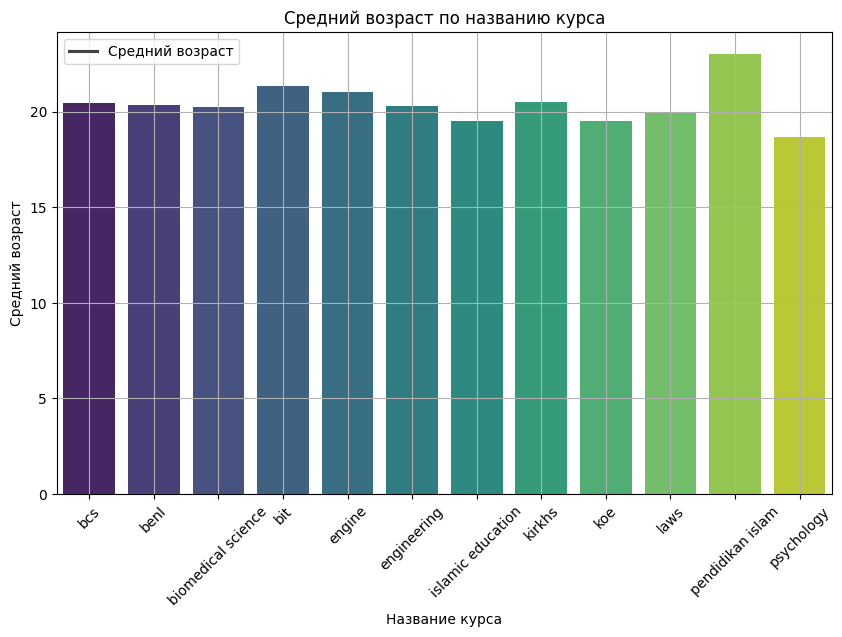

In [88]:
# @title
# Диаграмма распределения среднего возраста по названию курса
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data['age']['mean'], palette='viridis')
plt.title('Средний возраст по названию курса')
plt.xlabel('Название курса')
plt.ylabel('Средний возраст')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(['Средний возраст'])
plt.show()

<ipython-input-89-f59d46079dbe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data['cgpa']['mean'], palette='coolwarm')


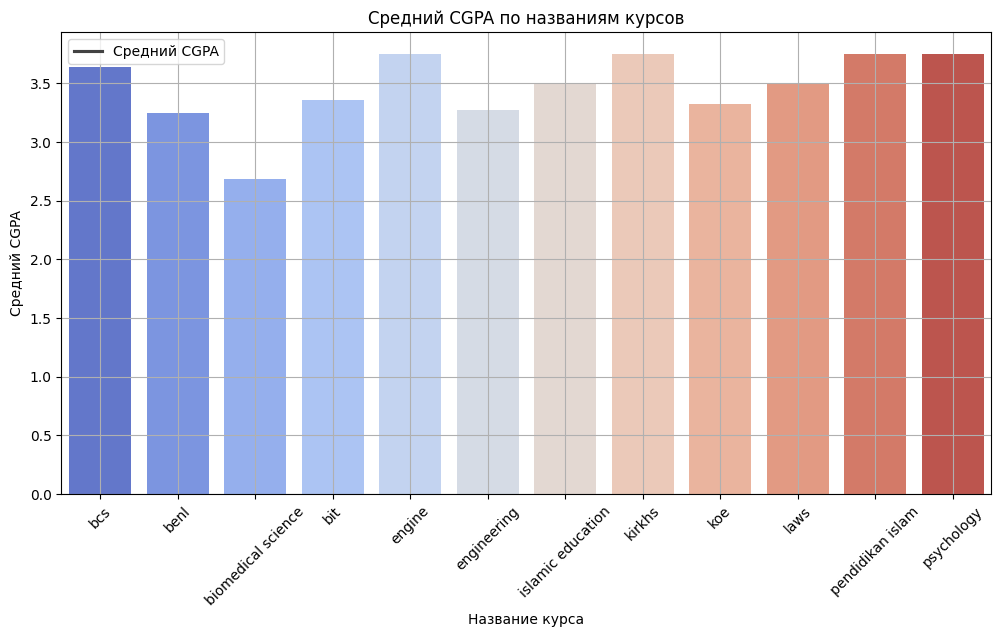

In [89]:
# @title
# Диаграмма распределения среднего значения CGPA по названию курса
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_data.index, y=grouped_data['cgpa']['mean'], palette='coolwarm')
plt.title('Средний CGPA по названиям курсов')
plt.xlabel('Название курса')
plt.ylabel('Средний CGPA')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(['Средний CGPA'])
plt.show()

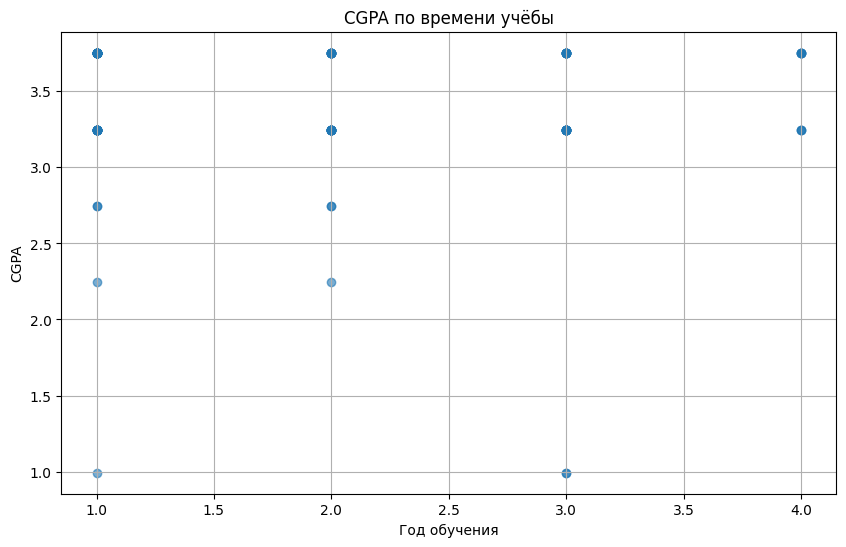

In [90]:
# @title
# Точечный график CGPA по времени учёбы
plt.figure(figsize=(10, 6))
plt.scatter(data['study_time'], data['cgpa'], alpha=0.6)
plt.title('CGPA по времени учёбы')
plt.xlabel('Год обучения')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()

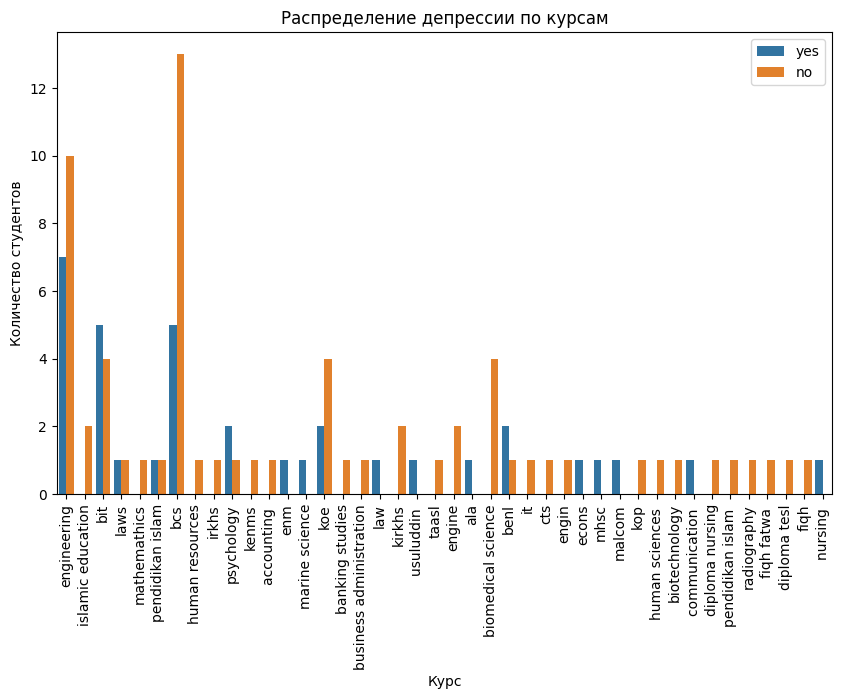

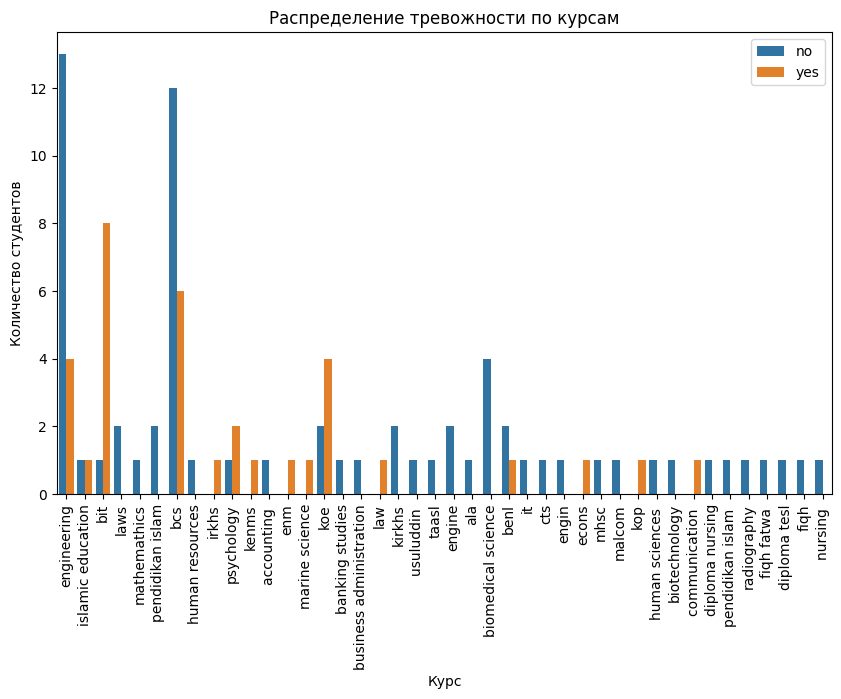

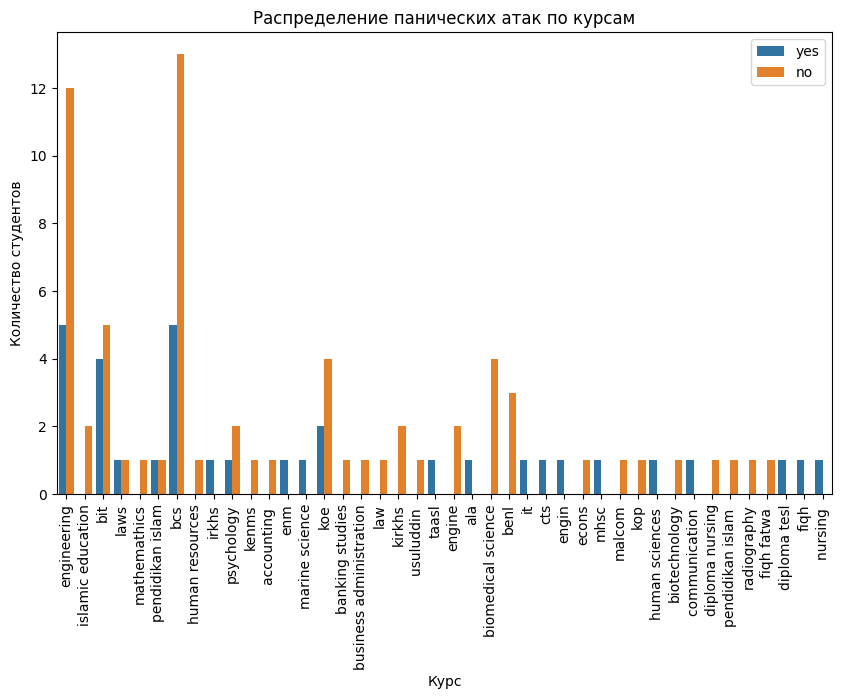

In [91]:
# Распределение психологических расстройств по курсам
plt.figure(figsize=(10, 6))
sns.countplot(x='name_of_course', hue='depression', data=data)
plt.title('Распределение депрессии по курсам')
plt.xlabel('Курс')
plt.ylabel('Количество студентов')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='name_of_course', hue='anxiety', data=data)
plt.title('Распределение тревожности по курсам')
plt.xlabel('Курс')
plt.ylabel('Количество студентов')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='name_of_course', hue='panic_attack', data=data)
plt.title('Распределение панических атак по курсам')
plt.xlabel('Курс')
plt.ylabel('Количество студентов')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


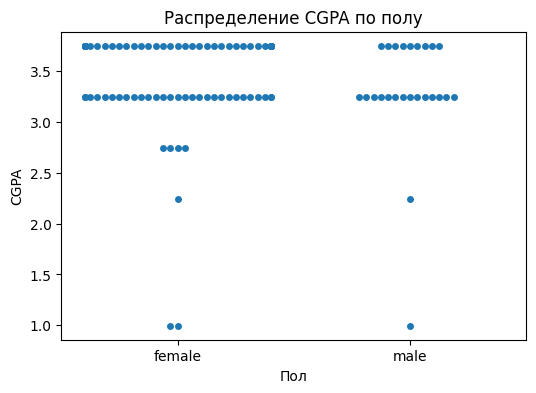

In [92]:
# CGPA по полу
plt.figure(figsize=(6, 4))
sns.swarmplot(x='gender', y='cgpa', data=data)
plt.title('Распределение CGPA по полу')
plt.xlabel('Пол')
plt.ylabel('CGPA')
plt.show()

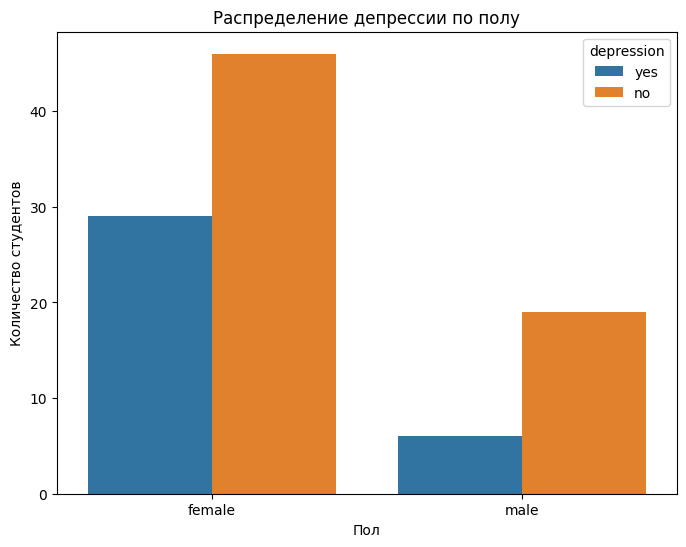

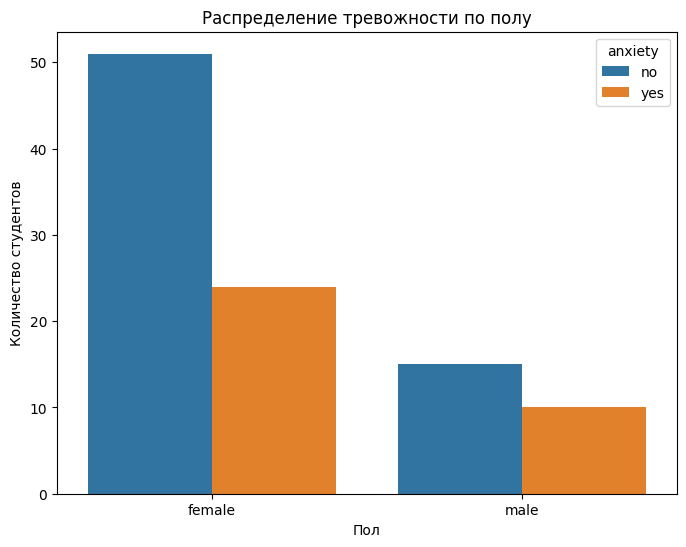

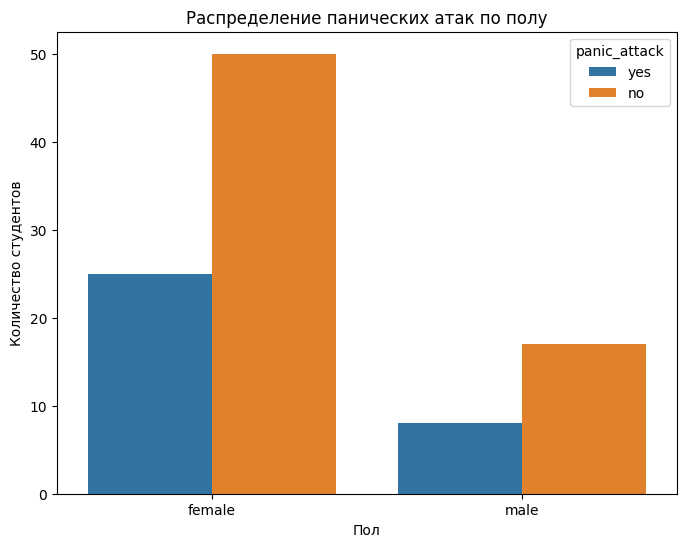

In [93]:
# Распределение психологических расстройств по полу
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='depression', data=data)
plt.title('Распределение депрессии по полу')
plt.xlabel('Пол')
plt.ylabel('Количество студентов')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='anxiety', data=data)
plt.title('Распределение тревожности по полу')
plt.xlabel('Пол')
plt.ylabel('Количество студентов')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='panic_attack', data=data)
plt.title('Распределение панических атак по полу')
plt.xlabel('Пол')
plt.ylabel('Количество студентов')
plt.show()

## 2. Диаграммы, библиотека Seaborn

<ipython-input-94-128f0f7aab13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='treatment', y='cgpa', palette='Set1')


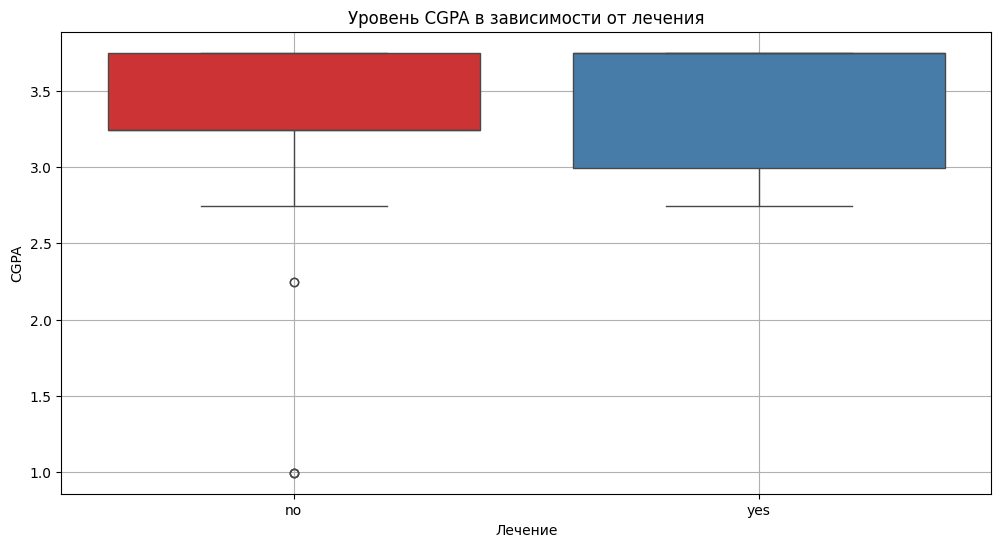

In [94]:
# @title
# Диаграмма boxplot для изучения влияния лечения на CGPA
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='treatment', y='cgpa', palette='Set1')
plt.title('Уровень CGPA в зависимости от лечения')
plt.xlabel('Лечение')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()

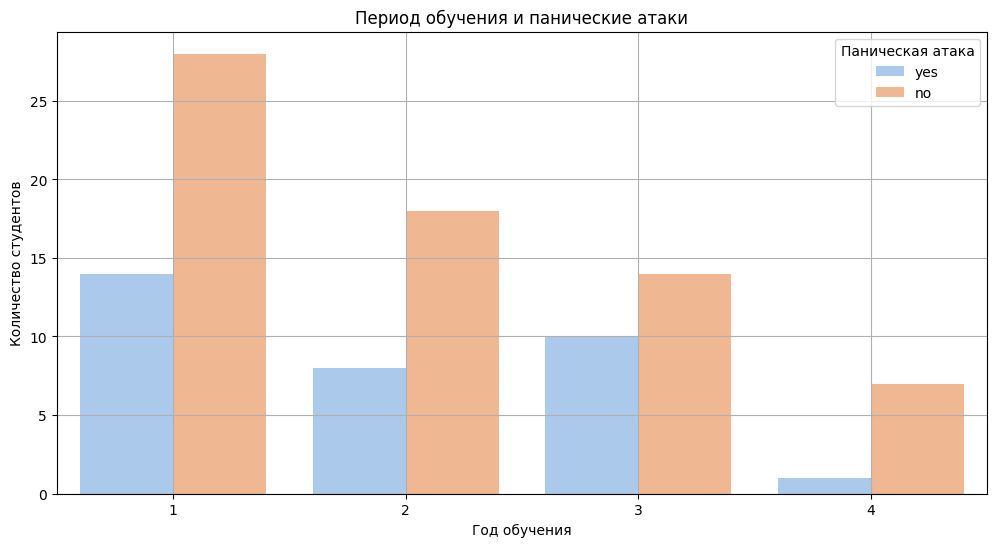

In [95]:
# @title
# Диаграмма для изучения зависимости состояния здоровья от времени учёбы
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='study_time', hue='panic_attack', palette='pastel')
plt.title('Период обучения и панические атаки')
plt.xlabel('Год обучения')
plt.ylabel('Количество студентов')
plt.grid(True)
plt.legend(title='Паническая атака')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-96-bc211ca9c426>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.

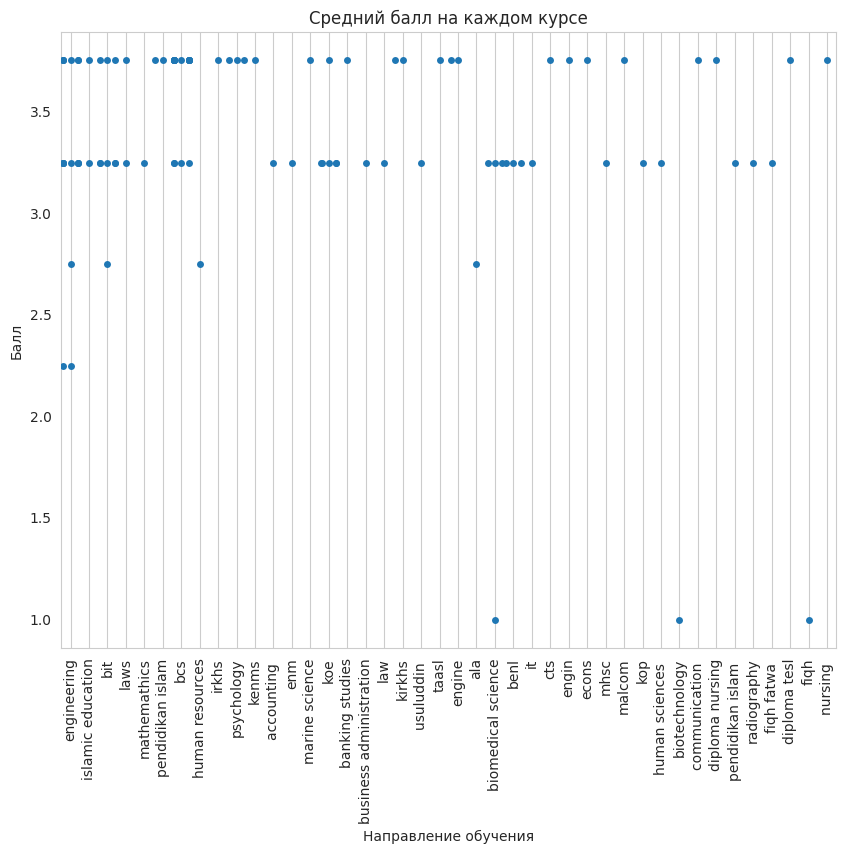

In [96]:
# @title
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(10, 8))
sns.swarmplot(x='name_of_course', y='cgpa', data=data, ax=ax)
plt.title('Средний балл на каждом курсе')

ax.set_xlabel('Направление обучения')
ax.set_ylabel('Балл')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.grid()
plt.show()

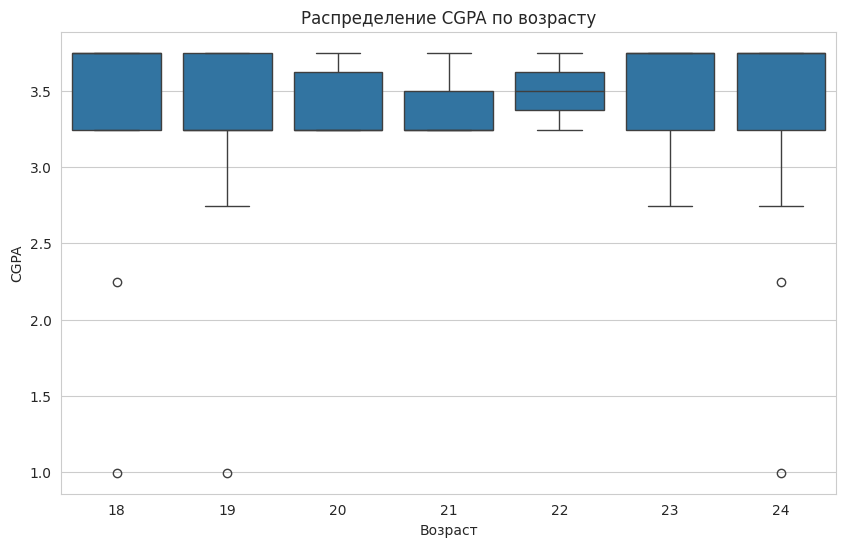

In [97]:
# CGPA по возрасту
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='cgpa', data=data)
plt.title('Распределение CGPA по возрасту')
plt.xlabel('Возраст')
plt.ylabel('CGPA')
plt.show()

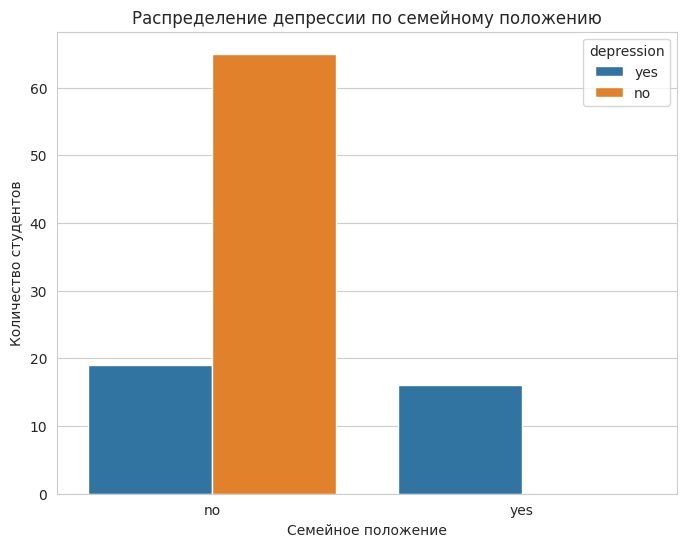

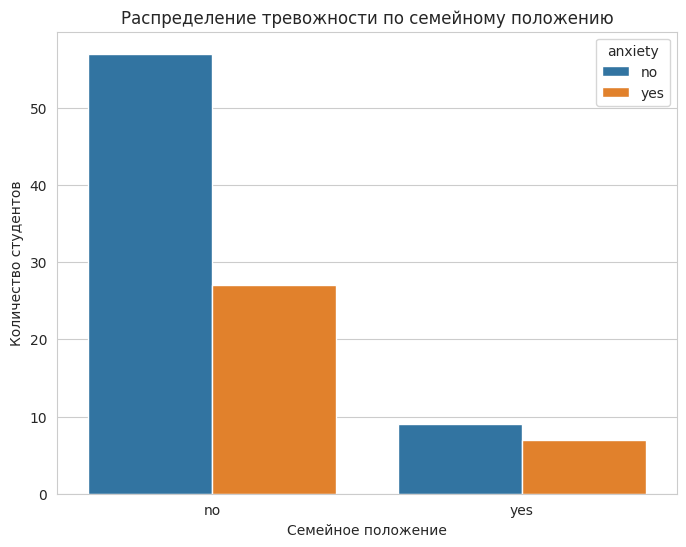

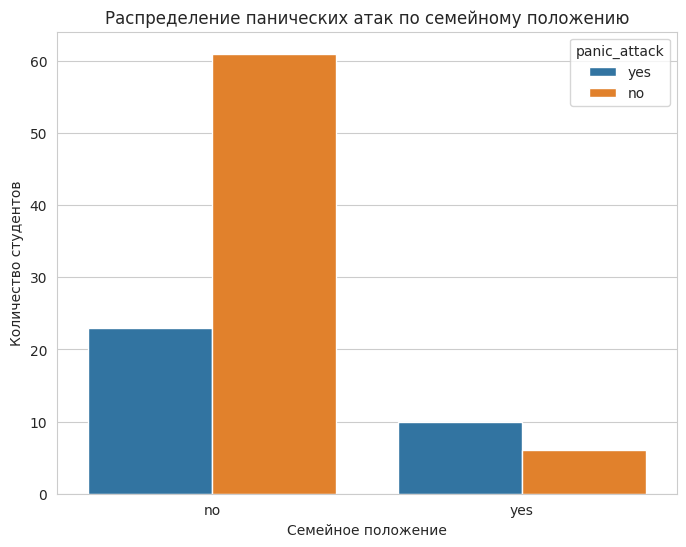

In [98]:
# Распределение психологических расстройств по семейному положению
plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', hue='depression', data=data)
plt.title('Распределение депрессии по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Количество студентов')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', hue='anxiety', data=data)
plt.title('Распределение тревожности по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Количество студентов')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', hue='panic_attack', data=data)
plt.title('Распределение панических атак по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Количество студентов')
plt.show()

## 3. "Портрет" типичного потребителя (вывод к разделу 3)

> На основе полученных данных составьте «портрет» типичного
потребителя в рамках исследуемой предметной области

Студенты с низким cgpa и наличием психологических расстройств являются потребителями в рамках поставленной задачи.

Наиболее низкий сgpa был замечен у студентов:
1. 1 и 3 курса.
2. Курсов: biomedical science, benl, bit, engineering, koe.
3. Мужского пола.
4. Возрастом 19 и 24 лет.



# Общий вывод по проекту

После тщательного анализа данных, предоставленных в датасете, удалось установить, что психологическое здоровье студентов и их успеваемость довольно сильно зависят от друг друга. Студенты с психологическими проблемами имиеют склонность к плохой успеваемости.

Плохая успеваемость и сильная психологическая нагрузка была выявлена у студентов:
1. Получающих лечение на курсе engineering.
2. Неполучающих лечение biomedical science, biotechnology, fiqh, human resources.

От депрессии и тревоги наиболее часто страдают девушки на начальных курсах обучения, не состоящие в браке. Панические атаки чаще испытывают парни - студенты старших курсов, не состоящие в браке.

Низкий cgpa также можно заметить у студентов без каких либо из предложенных проблем (депрессия, тревожность, панические атаки). Среди них есть те, кто состоит в браке. Вполне возможно, что наличие супруги/супруга может отвлекать от учебы, но иметь большую роль как психологическая поддержка.

Однако, некоторые студенты имеют хорошую успеваемость, несмотря на психологические трудности. Вполне возможно, что депрессия и прочие заболевания являются следствием усердной и напряжённой учёбы. В связи с этим, можно предложить следующие введения не только в университетах, но и прочих образовательных учреждениях:


- Разработать программы поддержки для студентов, испытывающих психологические расстройства, включая обязательные консультации с психологом/психотерапевтом для тяжёлых форм заболеваний.
- Обеспечить доступ к психологической помощи и консультированию для всех студентов, т.е.бюджетность и удобство лечения.
- Создать благоприятную атмосферу в учебном заведении, которая бы способствовала открытому обсуждению вопросов психического здоровья.
- Предоставить информацию о первых признаках наличия отклонений в психике и способах борьбы с эмоциональным давлением.

Данные выводы являются лишь предварительной картиной и необходимо провести более глубокое исследование для получения более точной информации, с учетом дополнительных факторов, таких как обстановка в семье, финансовое положение, доступность ресурсов и т.д.